In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env BSD500_DATA_DIR=/home/zaccharie/workspace/understanding-unets/
%env BSD68_DATA_DIR=/home/zaccharie/workspace/understanding-unets/

env: BSD500_DATA_DIR=/home/zaccharie/workspace/understanding-unets/
env: BSD68_DATA_DIR=/home/zaccharie/workspace/understanding-unets/


In [3]:
%cd ..
from tdv import TDV, TV
%cd experiments
from data import im_dataset_bsd500
from unrolled_fb import UnrolledFB

/home/zaccharie/workspace/tf-tdv
/home/zaccharie/workspace/tf-tdv/experiments


In [4]:
!pip install tensorflow-addons

In [5]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

In [6]:
train_ds = im_dataset_bsd500(batch_size=4, noise_std=40)

In [49]:
model = UnrolledFB(TDV, {'n_macro': 2, 'n_filters': 8}, init_step_size=0.0001, n_iter=5)

In [50]:
model.compile(loss='mse', optimizer='adam')

In [51]:
%%time
data = next(iter(train_ds))

CPU times: user 146 ms, sys: 4.05 ms, total: 150 ms
Wall time: 59 ms


In [52]:
## overfitting
model.fit(x=data[0][0:1], y=data[1][0:1], epochs=100, batch_size=1)

Epoch 1/100
1/1 [==============================] - 0s 714us/step - loss: 0.0270
Epoch 2/100
1/1 [==============================] - 0s 592us/step - loss: 0.1787
Epoch 3/100
1/1 [==============================] - 0s 637us/step - loss: 0.5497
Epoch 4/100
1/1 [==============================] - 0s 589us/step - loss: 0.6255
Epoch 5/100
1/1 [==============================] - 0s 873us/step - loss: 1.0778
Epoch 6/100
1/1 [==============================] - 0s 621us/step - loss: 2.3574
Epoch 7/100
1/1 [==============================] - 0s 832us/step - loss: 1.8274
Epoch 8/100
1/1 [==============================] - 0s 991us/step - loss: 2.0050
Epoch 9/100
1/1 [==============================] - 0s 821us/step - loss: 2.1861
Epoch 10/100
1/1 [==============================] - 0s 742us/step - loss: 1.7308
Epoch 11/100
1/1 [==============================] - 0s 908us/step - loss: 1.7025
Epoch 12/100
1/1 [==============================] - 0s 653us/step - loss: 1.5088
Epoch 13/100
1/1 [===================

In [53]:
# Use a checkpoint cback in the future
# model.save_weights('denoising_unrolled_fb_tdv.h5')

In [54]:
res = model(data[0])
res_gt = model(data[1])

<IPython.core.display.Javascript object>


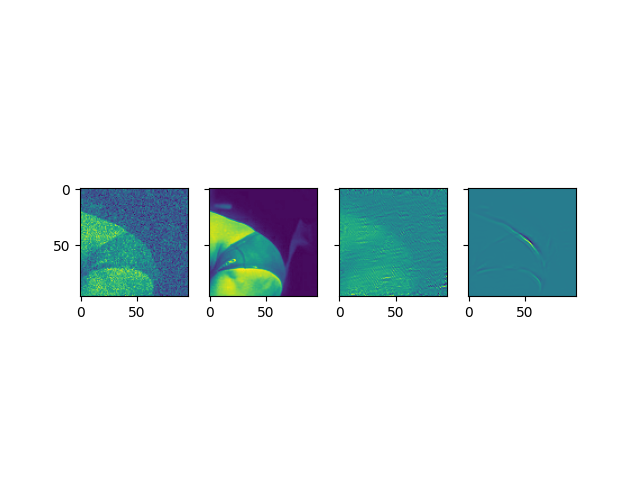

In [55]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)
axs[0].imshow(np.squeeze(data[0][0]))
axs[1].imshow(np.squeeze(data[1][0]))
axs[2].imshow(np.squeeze(res[0]))
axs[3].imshow(np.squeeze(res_gt[0]))

In [22]:
# model.fit(train_ds, epochs=int(1e3//400), steps_per_epoch=400)